### Hello World!
---

In [42]:
from qiskit import *
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
%matplotlib inline

#### Building a Circuit
---

In [43]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

In [44]:
circuit.draw()

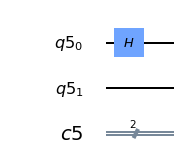

In [45]:
circuit.h(qr[0])
circuit.draw(output="mpl")

In [46]:
circuit.cx(qr[0], qr[1])  # if qr[0], then qr[1]
circuit.draw("mpl")

In [47]:
circuit.measure(qr, cr)
circuit.draw("mpl")

In [48]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()

#### Visualizing
---

In [49]:
from qiskit.tools.visualization import plot_histogram

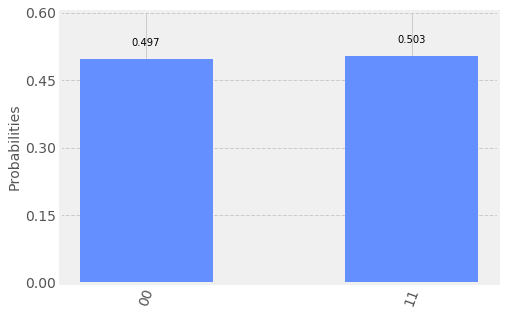

In [50]:
plot_histogram(result.get_counts(circuit))

#### Run on a real Quantum Computer
---

In [51]:
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [52]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend("ibmq_16_melbourne")

In [53]:
job = execute(circuit, backend=qcomp)

In [55]:
from qiskit.tools.monitor import job_monitor

In [56]:
job_monitor(job)

Job Status: job has successfully run


In [60]:
result = job.result()

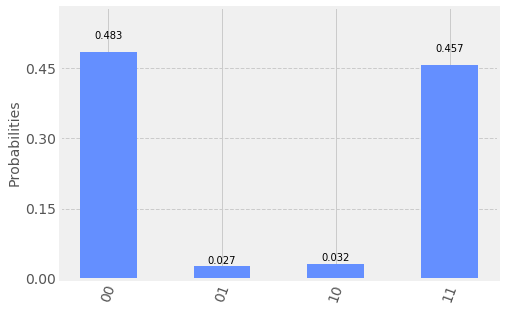

In [62]:
plot_histogram(result.get_counts())